# **Raphael Oko Okai**

#  Project
### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.


**Thank you**

**GOOD LUCK!**





In [ ]:
# Use markdowns to write your answers or findings where necessary.
# Use comments to exlain you codes where necessary 
# Remember to import the necessary packages

### **NB**: To easily load the data, it's advisable you have the data and the notebook file  in the same folder

In [1]:
#import your packages here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load the sales data here

df = pd.read_csv("sales_data.csv")
df.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


### 1.i. Average sales and profit per market

In [3]:
sales_profit = df[["Sales", "Profit", "Market"]]
sales_profit.mean()

Sales     246.811106
Profit     29.490197
dtype: float64

### 1. ii. A stacked bar chart showing the sales and profit per market

In [4]:
ave_sales_n_profit = sales_profit.groupby("Market")[["Sales", "Profit"]].sum()
print(ave_sales_n_profit)

               Sales        Profit
Market                            
APAC    974580.85590  123103.12590
Africa  229068.79200   26687.11200
Canada   19161.15000    5129.46000
EMEA    204640.68300   10598.04300
EU      761680.36500   98275.18500
LATAM   608140.77348   61415.37348
US      608473.83000   81726.93080


In [5]:
ave_sales_n_profit.mean()

Sales     486535.207054
Profit     58133.604311
dtype: float64

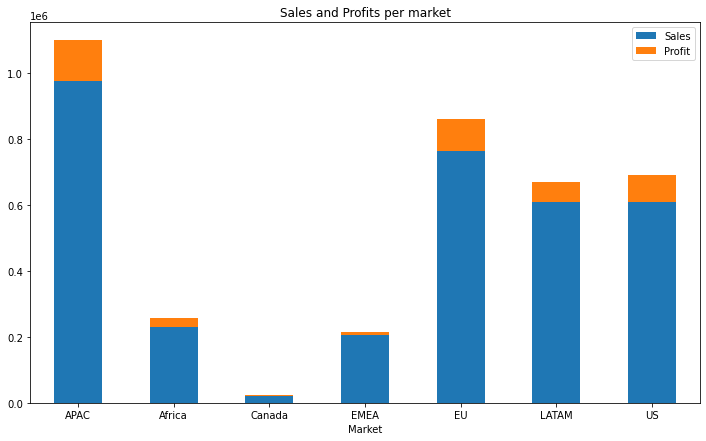

In [6]:
# Plot stacked bar chart
ave_sales_n_profit.plot(kind="bar", stacked=True, title="Sales and Profits per market", figsize=(12,7))

# Rotate tick label
plt.xticks(rotation='horizontal')

# Show
plt.show()

### 1. iii. Market with more sales on the average.

According to the graph above the APAC Market brings more sales on the average.

### 2.i. Best 10 performing products with regards to sales in 2013

In [7]:
products_perf = df[["Product Name", "Sales"]]

In [8]:
products_perf.nlargest(n=10, columns=["Sales"])

,Product Name,Sales
1103,Canon imageCLASS 2200 Advanced Copier,17499.950
8096,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
7308,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930
414,HP Designjet T520 Inkjet Large Format Printer ...,8749.950
10488,Canon imageCLASS 2200 Advanced Copier,8399.976
7234,"Motorola Smart Phone, Full Size",6439.800
5018,"Apple Smart Phone, with Caller ID",5751.540
1362,"Samsung Smart Phone, VoIP",5726.160
9151,"Barricks Conference Table, Fully Assembled",5451.300
2037,Hewlett Packard LaserJet 3310 Copier,5399.910


### 2. ii.  Least 10 performing products with regards to sales 2013

In [9]:
products_perf.nsmallest(n=10, columns=["Sales"])

,Product Name,Sales
9724,Avery Durable Slant Ring Binders With Label Ho...,0.836
3077,"Avery Hole Reinforcements, Clear",1.161
9062,Avery Hidden Tab Dividers for Binding Systems,1.192
5997,Insertable Tab Indexes For Data Binders,1.272
1558,"Avery Hole Reinforcements, Economy",1.323
5075,Computer Printout Index Tabs,1.344
9645,Prang Dustless Chalk Sticks,1.344
4307,Newell 310,1.408
5483,"Cardinal Hole Reinforcements, Clear",1.440
11998,"OIC #2 Pencils, Medium Soft",1.504


### 3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively.

In [10]:
df["Days"] = pd.DatetimeIndex(df["Order Date"]).day
df.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,1
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,1
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,1
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060,1
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410,1


In [11]:
df["Months"] = pd.DatetimeIndex(df["Order Date"]).month
df.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624,1,1
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700,1,1
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472,1,1
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060,1,1
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410,1,1


### 3. ii.  Trend of profit from January to December with a line plot.

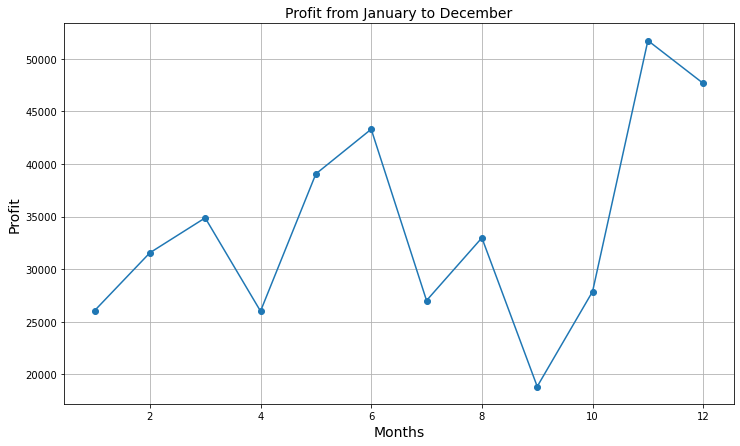

In [12]:
# Get the total profit from January to December
profit_by_month = df.groupby("Months")["Profit"].sum()

# Create a line plot of profit by date
profit_by_month.plot(x="Months", y="Profit", kind="line", marker='o', figsize=(12,7))
plt.title('Profit from January to December', fontsize=14)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

### 3. iii. Month of profit

According to the line graph above, the company made its most profit in the month of November.

### 5 most sold product in November

In [13]:
# Set months as the index and sort the index
month_profit = df[["Product Name", "Quantity", "Months"]]
month_index = month_profit.set_index("Months").sort_index().loc[11]
month_index.nlargest(n=5, columns=["Quantity"])

,Product Name,Quantity
Months,,
11,"Samsung Signal Booster, VoIP",14
11,"BIC Highlighters, Fluorescent",14
11,"Kleencut Shears, Steel",14
11,"Memorex Numeric Keypad, USB",14
11,Ultra Door Push Plate,14


### 3. iv. Days which the company makes high sales on average.

In [14]:
day_sales = df[["Sales", "Days"]]
ave_sales_in_day = day_sales.groupby("Days")[["Sales"]].mean()
print(ave_sales_in_day)

           Sales
Days            
1     316.403121
2     318.411526
3     291.859407
4     213.276352
5     212.703316
6     270.487194
7     264.379302
8     215.077669
9     223.629552
10    308.192499
11    208.422190
12    228.981232
13    201.898646
14    247.979581
15    238.873703
16    287.188757
17    271.615513
18    252.714262
19    246.303035
20    220.862014
21    236.366999
22    227.907205
23    208.919446
24    248.923563
25    244.850794
26    283.981118
27    254.233484
28    255.834067
29    242.991424
30    264.281520
31    251.382935


As seen above Day 2 are the days in which the company made high sales on average.

### 4. i. Correlation between sales and discount.

In [15]:
# calculate covariance matrix
covariance = np.cov(df["Sales"], df["Discount"])
print(covariance)

[[ 2.44747304e+05 -8.80274251e+00]
 [-8.80274251e+00  4.41215388e-02]]


In [16]:
# calculate Pearson's correlation
corr, _ = pearsonr(df["Sales"], df["Discount"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.085


We can see that the two variables, sales and discount are negatively correlated and that the correlation is -0.085. This suggests a low level of correlation, ie. a value above -0.5.

### 4. ii. A scatter plot to show the relationship between sales and profit.

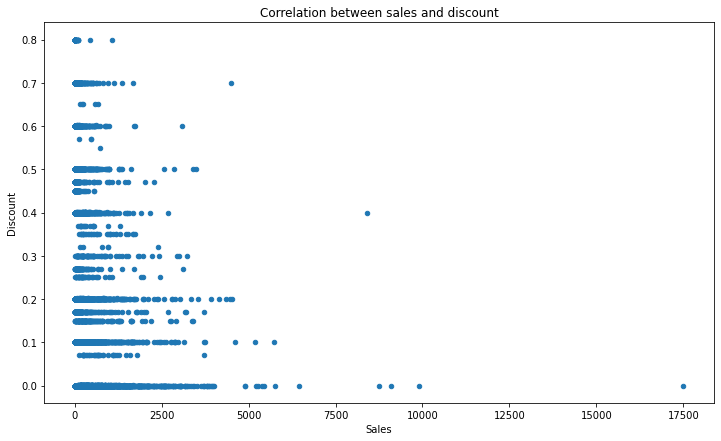

In [17]:
# Scatter plot of sales vs. discount
df.plot(x="Sales", y="Discount", kind="scatter", title="Correlation between sales and discount", figsize=(12,7))

# Show the plot
plt.show()

### 5. i.  A grouped bar chart showing the total profit for the different product category for each market.

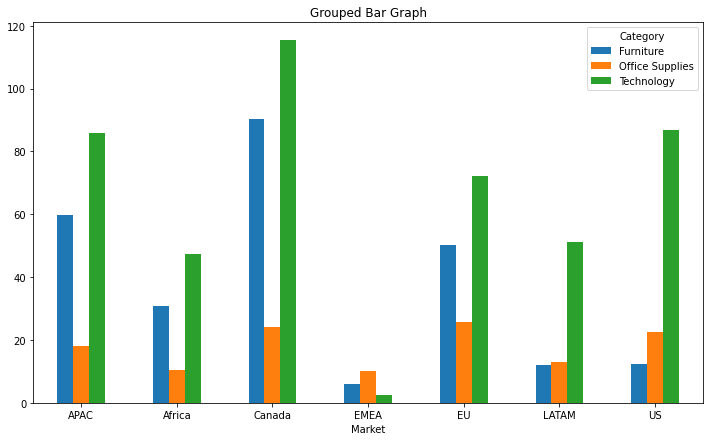

In [18]:
category_profit = df[["Category", "Market", "Profit"]]
category_profit.pivot_table(values="Profit", index="Market", columns="Category").plot(kind="bar", title="Grouped Bar Graph"
                                                                                      , figsize=(12,7))
# Rotate tick label
plt.xticks(rotation='horizontal')
plt.show()

### 5. ii. Product category which performed well in each market.

From grouped bar graph above, technology product category performed well in each market except the EMEA Market were Office Supplies outperformed technology and Furniture.

### 6. i. Customer with highest sales.

In [19]:
# Get customers by sales
customer_sales = df.groupby("Customer Name")[["Sales"]].sum()

# Get customer with most sales
customer_sales.nlargest(n=1, columns=["Sales"])

,Sales
Customer Name,
Tamara Chand,23190.408


Tamara Chand spent the most in the whole year.

### 6. ii. Most purchased product by customer with highest sales

In [20]:
# Slicing row by columns
customer_sales = df[["Customer Name", "Product Name", "Quantity", "Sales", "Months"]]

# Slicing row by customer name
customer_tamara = customer_sales[customer_sales["Customer Name"]=="Tamara Chand"]
customer_tamara.nlargest(n=1, columns=["Quantity"])

,Customer Name,Product Name,Quantity,Sales,Months
3409,Tamara Chand,"Sanford Markers, Water Color",9,158.58,8


Tamara Chand bought Sanford Markers, Water Color the most.

###  6. iii. Month customer with highest sales spent the most.

In [21]:
# Slicing row by customer name
customer_tamara = customer_sales[customer_sales["Customer Name"]=="Tamara Chand"]
customer_tamara.nlargest(n=1, columns=["Sales"])

,Customer Name,Product Name,Quantity,Sales,Months
1103,Tamara Chand,Canon imageCLASS 2200 Advanced Copier,5,17499.95,3


Therefore the 3rd month, March, Tamara Chand spent the most.

### 6. iv. Total sales by the customer with highest sales spent across the year.

In [22]:
# Total sales of customer
tamara_sales = customer_sales[customer_sales["Customer Name"]=="Tamara Chand"]
tamara_sales["Sales"].sum()

23190.408

Tamara Chand spent the 23190.408 in total across the year.

### 7. Summary statistics.

### 7. i. Interquantile range (IQR) of sales and profit.

In [23]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# print IQR of sales and profit
print(df[["Sales", "Profit"]].agg([iqr, np.median]))

          Sales  Profit
iqr     218.904  36.852
median   85.232   9.240


### 7. ii. Customer with least sales.

In [24]:
# Slicing row by columns
customer_sales = df[["Customer Name", "Product Name", "Quantity", "Sales", "Market"]]

# Get customer with least sales
customer_sales.nsmallest(n=1, columns=["Sales"])

,Customer Name,Product Name,Quantity,Sales,Market
9724,Ken Brennan,Avery Durable Slant Ring Binders With Label Ho...,1,0.836,US


Therefore Ken Brennan had the least sales in the year.

### 7. iii. Market with least sales and profit.

In [25]:
low_sales_n_profit = sales_profit.groupby("Market")[["Sales", "Profit"]].sum()
low_sales_n_profit.nsmallest(n=7, columns=["Sales", "Profit"])

,Sales,Profit
Market,,
Canada,19161.15000,5129.46000
EMEA,204640.68300,10598.04300
Africa,229068.79200,26687.11200
LATAM,608140.77348,61415.37348
US,608473.83000,81726.93080
EU,761680.36500,98275.18500
APAC,974580.85590,123103.12590
